<a href="https://colab.research.google.com/github/aadiharan99/AI-Project/blob/master/AI_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.7-cp36-none-any.whl size=34388 sha256=f4cb48994781914bca1abc658c6f111b95e4f134e97efd195888bf3696917669
  Stored in directory: /root/.cache/pip/wheels/88/89/1e/3dfa14f863314a42481d8926d9ef4825da5d899e026435fc3a
Successfully built nsepy


In [0]:
import numpy as np
import nsepy as NSE
from sklearn.preprocessing import MinMaxScaler as mms
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
infy_traindata=NSE.get_history(symbol='INFY',start=date(2015,1,1),end=date(2018,9,27))
infy_testdata=NSE.get_history(symbol='INFY',start=date(2018,9,28),end=date(2019,9,28))


In [0]:
list(infy_traindata)

infy_traindata.drop(['Symbol','Series','Prev Close','Last','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'],1,inplace=True)
infy_traindata.head()

trainset=infy_traindata.iloc[:,3:4].values
(trainset)

array([[1974.4 ],
       [2013.2 ],
       [1995.9 ],
       [1954.2 ],
       [1963.55],
       [1973.45],
       [2074.45],
       [2115.95],
       [2088.9 ],
       [2128.65],
       [2134.25],
       [2118.3 ],
       [2102.5 ],
       [2124.2 ],
       [2169.9 ],
       [2196.45],
       [2215.05],
       [2136.5 ],
       [2144.55],
       [2145.5 ],
       [2141.9 ],
       [2136.85],
       [2120.9 ],
       [2142.85],
       [2193.8 ],
       [2230.5 ],
       [2248.9 ],
       [2278.3 ],
       [2284.85],
       [2311.2 ],
       [2296.1 ],
       [2278.75],
       [2296.5 ],
       [2324.7 ],
       [2283.1 ],
       [2265.6 ],
       [2272.8 ],
       [2317.6 ],
       [2258.1 ],
       [2265.75],
       [2296.45],
       [2291.7 ],
       [2297.85],
       [2274.65],
       [2247.6 ],
       [2190.05],
       [2198.  ],
       [2182.2 ],
       [2218.3 ],
       [2220.4 ],
       [2266.65],
       [2240.5 ],
       [2229.5 ],
       [2230.45],
       [2257.45],
       [22

In [0]:
scaler=mms(feature_range=(0,1))
trainset_scaled=scaler.fit_transform(trainset)

x_train=[]
y_train=[]

for i in range(60, 926):
    x_train.append(trainset_scaled[i-60:i, 0])
    y_train.append(trainset_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
x_train.shape

[[[0.78368532]
  [0.80764481]
  [0.79696184]
  ...
  [0.93479066]
  [0.88986662]
  [0.92432382]]

 [[0.80764481]
  [0.79696184]
  [0.77121156]
  ...
  [0.88986662]
  [0.92432382]
  [0.94028653]]

 [[0.79696184]
  [0.77121156]
  [0.7769853 ]
  ...
  [0.92432382]
  [0.94028653]
  [0.93432753]]

 ...

 [[0.35355687]
  [0.3487094 ]
  [0.36081265]
  ...
  [0.00852167]
  [0.00892306]
  [0.        ]]

 [[0.3487094 ]
  [0.36081265]
  [0.37168087]
  ...
  [0.00892306]
  [0.        ]
  [0.00799679]]

 [[0.36081265]
  [0.37168087]
  [0.38866247]
  ...
  [0.        ]
  [0.00799679]
  [0.01290601]]]


(866, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
regressor.add(Dense(units=1))

In [0]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32,verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [0]:
infy_testdata

In [0]:
infy_testdata.drop(['Symbol','Series','Prev Close','Last','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'],1,inplace=True)

In [0]:
infy_testdata

In [0]:
testprice=infy_testdata.iloc[:,3:4].values

In [0]:
dataset_total = pd.concat((infy_traindata['Close'], infy_testdata['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(infy_testdata) - 60:].values
inputs = inputs.reshape(-1,1)

In [0]:
inputs = scaler.transform(inputs)

In [0]:
x_test = []
for i in range(60, 245):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

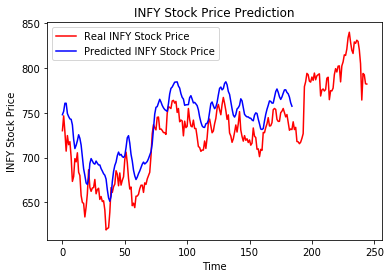

In [0]:
plt.plot(testprice, color = 'red', label = 'Real INFY Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted INFY Stock Price')
plt.title('INFY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('INFY Stock Price')
plt.legend()
plt.show()


In [0]:
model1=regressor.save('infyreg')

In [0]:
from keras.models import load_model

In [0]:
model=load_model('infyreg')

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [0]:
#YESBANK
yesbank_traindata=NSE.get_history(symbol='YESBANK',start=date(2015,1,1),end=date(2018,9,27))
yesbank_testdata=NSE.get_history(symbol='YESBANK',start=date(2018,9,28),end=date(2019,9,28))

In [0]:
droplist=['Symbol','Series','Prev Close','Last','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble']

In [0]:
for i in droplist:
  yesbank_traindata.drop(i,1,inplace=True)

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,769.00,774.65,766.05,772.55,735005
2015-01-02,773.00,795.80,771.00,792.20,2125479
2015-01-05,796.50,804.90,789.80,793.90,2832814
2015-01-06,788.55,788.80,768.35,771.65,2549801
2015-01-07,770.00,776.00,754.25,757.35,3113425


In [0]:
ybtrainset=yesbank_traindata.iloc[:,3:4].values

In [0]:

ybtrainset_scaled=scaler.fit_transform(ybtrainset)

x_train_yb=[]
y_train_yb=[]

for i in range(60, 926):
    x_train_yb.append(ybtrainset_scaled[i-60:i, 0])
    y_train_yb.append(ybtrainset_scaled[i, 0])
x_train_yb, y_train_yb = np.array(x_train_yb), np.array(y_train_yb)

# Reshaping
x_train_yb = np.reshape(x_train_yb, (x_train_yb.shape[0], x_train_yb.shape[1], 1))
print(x_train_yb)


[[[0.33950562]
  [0.35122402]
  [0.35223783]
  ...
  [0.35975192]
  [0.35966246]
  [0.3654173 ]]

 [[0.35122402]
  [0.35223783]
  [0.3389689 ]
  ...
  [0.35966246]
  [0.3654173 ]
  [0.36956198]]

 [[0.35223783]
  [0.3389689 ]
  [0.33044101]
  ...
  [0.3654173 ]
  [0.36956198]
  [0.36526821]]

 ...

 [[0.07913648]
  [0.07892775]
  [0.07517071]
  ...
  [0.07174166]
  [0.06914751]
  [0.01386528]]

 [[0.07892775]
  [0.07517071]
  [0.08134299]
  ...
  [0.06914751]
  [0.01386528]
  [0.01380565]]

 [[0.07517071]
  [0.08134299]
  [0.07979247]
  ...
  [0.01386528]
  [0.01380565]
  [0.00981006]]]


In [0]:
ybregressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
ybregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
ybregressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
ybregressor.add(LSTM(units = 50, return_sequences = True))
ybregressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
ybregressor.add(LSTM(units = 50))
ybregressor.add(Dropout(0.2))

In [0]:
ybregressor.add(Dense(units=1))

In [0]:
ybregressor.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
ybregressor.fit(x_train_yb,y_train_yb,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
866/866 [==============================] - 7s 8ms/step - loss: 0.0583
Epoch 2/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0125
Epoch 3/100
866/866 [==============================] - 4s 5ms/step - loss: 0.0093
Epoch 4/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0092
Epoch 5/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0090
Epoch 6/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0083
Epoch 7/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0082
Epoch 8/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0075
Epoch 9/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0125
Epoch 10/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0076
Epoch 11/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0072
Epoch 12/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0073
Epoch 13/100


In [0]:
ybregressor.save('yesbank')

In [0]:
for i in droplist:
  yesbank_testdata.drop(i,1,inplace=True)

In [0]:
yesbank_testdata.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-09-28,203.6,204.00,165.00,183.65,148654874
2018-10-01,180.0,203.80,170.60,200.85,130992623
2018-10-03,205.0,222.95,202.25,212.75,97945695
2018-10-04,209.4,220.00,205.05,215.00,65604016
2018-10-05,215.0,218.50,203.10,206.00,40546788


In [0]:
ybtestprice=yesbank_testdata.iloc[:,3:4].values

In [0]:
dataset_total_yb = pd.concat((yesbank_traindata['Close'], yesbank_testdata['Close']), axis = 0)
inputs_yb = dataset_total_yb[len(dataset_total_yb) - len(yesbank_testdata) - 60:].values
inputs_yb = inputs_yb.reshape(-1,1)

In [0]:
inputs_yb = scaler.transform(inputs_yb)

In [0]:
x_testyb = []
for i in range(60, 245):
    x_testyb.append(inputs_yb[i-60:i, 0])
x_testyb = np.array(x_testyb)
x_testyb = np.reshape(x_testyb, (x_testyb.shape[0], x_testyb.shape[1], 1))
predicted_stock_priceyb = ybregressor.predict(x_testyb)
predicted_stock_priceyb = scaler.inverse_transform(predicted_stock_priceyb)

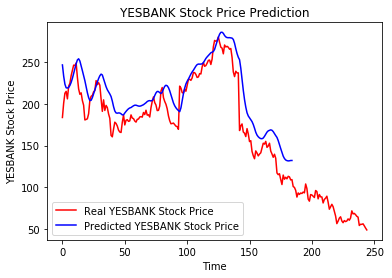

In [0]:
plt.plot(ybtestprice, color = 'red', label = 'Real YESBANK Stock Price')
plt.plot(predicted_stock_priceyb, color = 'blue', label = 'Predicted YESBANK Stock Price')
plt.title('YESBANK Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('YESBANK Stock Price')
plt.legend()
plt.show()

In [0]:
#AXISBANK
axisbank_traindata=NSE.get_history(symbol='AXISBANK',start=date(2015,1,1),end=date(2018,9,27))
axisbank_testdata=NSE.get_history(symbol='AXISBANK',start=date(2018,9,28),end=date(2019,9,28))

In [0]:
for i in droplist:
  axisbank_traindata.drop(i,1,inplace=True)

In [0]:
abtrainset=axisbank_traindata.iloc[:,3:4].values

In [0]:
abtrainset_scaled=scaler.fit_transform(abtrainset)

x_train_ab=[]
y_train_ab=[]

for i in range(60, 926):
    x_train_ab.append(abtrainset_scaled[i-60:i, 0])
    y_train_ab.append(abtrainset_scaled[i, 0])
x_train_ab, y_train_ab = np.array(x_train_ab), np.array(y_train_ab)

# Reshaping
x_train_ab = np.reshape(x_train_ab, (x_train_ab.shape[0], x_train_ab.shape[1], 1))
print(x_train_ab)


In [0]:
abregressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
abregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
abregressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
abregressor.add(LSTM(units = 50, return_sequences = True))
abregressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
abregressor.add(LSTM(units = 50))
abregressor.add(Dropout(0.2))

In [0]:
abregressor.add(Dense(units=1))

In [0]:
abregressor.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
abregressor.fit(x_train_ab,y_train_ab,epochs=100,batch_size=32,verbose=1)

In [0]:
for i in droplist:
  axisbank_testdata.drop(i,1,inplace=True)

In [0]:
abtestprice=axisbank_testdata.iloc[:,3:4].values

In [0]:
dataset_total_ab = pd.concat((axisbank_traindata['Close'], axisbank_testdata['Close']), axis = 0)
inputs_ab = dataset_total_ab[len(dataset_total_ab) - len(axisbank_testdata) - 60:].values
inputs_ab = inputs_ab.reshape(-1,1)

In [0]:
inputs_ab = scaler.transform(inputs_ab)

In [0]:
x_testab = []
for i in range(60, 245):
    x_testab.append(inputs_ab[i-60:i, 0])
x_testab = np.array(x_testab)
x_testab = np.reshape(x_testab, (x_testab.shape[0], x_testab.shape[1], 1))
predicted_stock_priceab = abregressor.predict(x_testab)
predicted_stock_priceab = scaler.inverse_transform(predicted_stock_priceab)

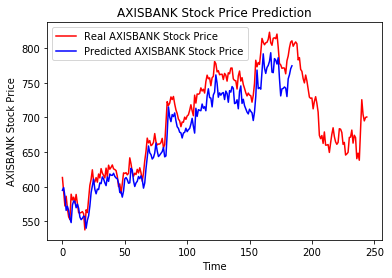

In [0]:
plt.plot(abtestprice, color = 'red', label = 'Real AXISBANK Stock Price')
plt.plot(predicted_stock_priceab, color = 'blue', label = 'Predicted AXISBANK Stock Price')
plt.title('AXISBANK Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AXISBANK Stock Price')
plt.legend()
plt.show()

In [0]:
abregressor.save('axisbank')

In [0]:
#RELIANCE
ril_traindata=NSE.get_history(symbol='RELIANCE',start=date(2015,1,1),end=date(2018,9,27))
ril_testdata=NSE.get_history(symbol='RELIANCE',start=date(2018,9,28),end=date(2019,9,28))

In [0]:
for i in droplist:
  ril_traindata.drop(i,1,inplace=True)

In [0]:
riltrainset=ril_traindata.iloc[:,3:4].values

In [0]:
riltrainset_scaled=scaler.fit_transform(riltrainset)

x_train_ril=[]
y_train_ril=[]

for i in range(60, 926):
    x_train_ril.append(riltrainset_scaled[i-60:i, 0])
    y_train_ril.append(riltrainset_scaled[i, 0])
x_train_ril, y_train_ril = np.array(x_train_ril), np.array(y_train_ril)

# Reshaping
x_train_ril = np.reshape(x_train_ril, (x_train_ril.shape[0], x_train_ril.shape[1], 1))
print(x_train_ril)

In [0]:
rilregressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
rilregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
rilregressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
rilregressor.add(LSTM(units = 50, return_sequences = True))
rilregressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
rilregressor.add(LSTM(units = 50))
rilregressor.add(Dropout(0.2))

In [0]:
rilregressor.add(Dense(units=1))

In [0]:
rilregressor.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
rilregressor.fit(x_train_ril,y_train_ril,epochs=100,batch_size=32,verbose=1)

In [0]:
for i in droplist:
  ril_testdata.drop(i,1,inplace=True)

In [0]:
riltestprice=ril_testdata.iloc[:,3:4].values

In [0]:
dataset_total_ril = pd.concat((ril_traindata['Close'], ril_testdata['Close']), axis = 0)
inputs_ril = dataset_total_ril[len(dataset_total_ril) - len(ril_testdata) - 60:].values
inputs_ril = inputs_ril.reshape(-1,1)

In [0]:
inputs_ril = scaler.transform(inputs_ril)

In [0]:
x_testril = []
for i in range(60, 245):
    x_testril.append(inputs_ril[i-60:i, 0])
x_testril = np.array(x_testril)
x_testril = np.reshape(x_testril, (x_testril.shape[0], x_testril.shape[1], 1))
predicted_stock_priceril = rilregressor.predict(x_testril)
predicted_stock_priceril = scaler.inverse_transform(predicted_stock_priceril)

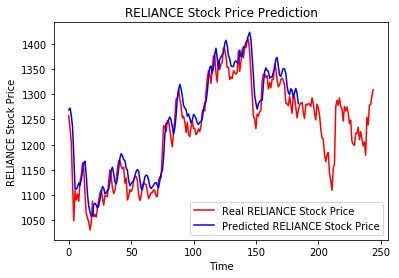

In [0]:
plt.plot(riltestprice, color = 'red', label = 'Real RELIANCE Stock Price')
plt.plot(predicted_stock_priceril, color = 'blue', label = 'Predicted RELIANCE Stock Price')
plt.title('RELIANCE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('RELIANCE Stock Price')
plt.legend()
plt.show()

In [0]:
rilregressor.save('ril')

In [0]:
#ITC
itc_traindata=NSE.get_history(symbol='ITC',start=date(2015,1,1),end=date(2018,9,27))
itc_testdata=NSE.get_history(symbol='ITC',start=date(2018,9,28),end=date(2019,9,28))

In [0]:
for i in droplist:
  itc_traindata.drop(i,1,inplace=True)

In [0]:
itctrainset=itc_traindata.iloc[:,3:4].values

In [0]:
itctrainset_scaled=scaler.fit_transform(itctrainset)

x_train_itc=[]
y_train_itc=[]

for i in range(60, 926):
    x_train_itc.append(itctrainset_scaled[i-60:i, 0])
    y_train_itc.append(itctrainset_scaled[i, 0])
x_train_itc, y_train_itc = np.array(x_train_itc), np.array(y_train_itc)

# Reshaping
x_train_itc = np.reshape(x_train_itc, (x_train_itc.shape[0], x_train_itc.shape[1], 1))

In [0]:
itcregressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
itcregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
itcregressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
itcregressor.add(LSTM(units = 50, return_sequences = True))
itcregressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
itcregressor.add(LSTM(units = 50))
itcregressor.add(Dropout(0.2))
itcregressor.add(Dense(units=1))
itcregressor.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
itcregressor.fit(x_train_itc,y_train_itc,epochs=100,batch_size=32,verbose=1)

In [0]:
for i in droplist:
  itc_testdata.drop(i,1,inplace=True)

In [0]:
itctestprice=itc_testdata.iloc[:,3:4].values

In [0]:
dataset_total_itc = pd.concat((itc_traindata['Close'], itc_testdata['Close']), axis = 0)
inputs_itc = dataset_total_itc[len(dataset_total_itc) - len(itc_testdata) - 60:].values
inputs_itc = inputs_itc.reshape(-1,1)

In [0]:
inputs_itc = scaler.transform(inputs_itc)

In [0]:
x_testitc = []
for i in range(60, 245):
    x_testitc.append(inputs_itc[i-60:i, 0])
x_testitc = np.array(x_testitc)
x_testitc = np.reshape(x_testitc, (x_testitc.shape[0], x_testitc.shape[1], 1))
predicted_stock_priceitc = itcregressor.predict(x_testitc)
predicted_stock_priceitc = scaler.inverse_transform(predicted_stock_priceitc)

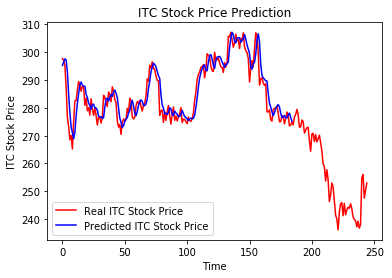

In [0]:
plt.plot(itctestprice, color = 'red', label = 'Real ITC Stock Price')
plt.plot(predicted_stock_priceitc, color = 'blue', label = 'Predicted ITC Stock Price')
plt.title('ITC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ITC Stock Price')
plt.legend()
plt.show()

In [0]:
#LT
lt_traindata=NSE.get_history(symbol='LT',start=date(2015,1,1),end=date(2018,9,27))
lt_testdata=NSE.get_history(symbol='LT',start=date(2018,9,28),end=date(2019,9,28))

In [0]:
for i in droplist:
  lt_traindata.drop(i,1,inplace=True)

In [0]:
lttrainset=lt_traindata.iloc[:,3:4].values

In [0]:
lttrainset_scaled=scaler.fit_transform(lttrainset)

x_train_lt=[]
y_train_lt=[]

for i in range(60, 926):
    x_train_lt.append(lttrainset_scaled[i-60:i, 0])
    y_train_lt.append(lttrainset_scaled[i, 0])
x_train_lt, y_train_lt = np.array(x_train_lt), np.array(y_train_lt)

# Reshaping
x_train_lt = np.reshape(x_train_lt, (x_train_lt.shape[0], x_train_lt.shape[1], 1))

In [0]:
ltregressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
ltregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
ltregressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
ltregressor.add(LSTM(units = 50, return_sequences = True))
ltregressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
ltregressor.add(LSTM(units = 50))
ltregressor.add(Dropout(0.2))
ltregressor.add(Dense(units=1))
ltregressor.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
ltregressor.fit(x_train_lt,y_train_lt,epochs=100,batch_size=32,verbose=1)

In [0]:
for i in droplist:
  lt_testdata.drop(i,1,inplace=True)

In [0]:
lttestprice=lt_testdata.iloc[:,3:4].values

In [0]:
dataset_total_lt = pd.concat((lt_traindata['Close'], lt_testdata['Close']), axis = 0)
inputs_lt = dataset_total_lt[len(dataset_total_lt) - len(lt_testdata) - 60:].values
inputs_lt = inputs_lt.reshape(-1,1)
inputs_lt = scaler.transform(inputs_lt)

In [0]:
x_testlt = []
for i in range(60, 245):
    x_testlt.append(inputs_lt[i-60:i, 0])
x_testlt = np.array(x_testlt)
x_testlt = np.reshape(x_testlt, (x_testlt.shape[0], x_testlt.shape[1], 1))
predicted_stock_pricelt = ltregressor.predict(x_testlt)
predicted_stock_pricelt = scaler.inverse_transform(predicted_stock_pricelt)

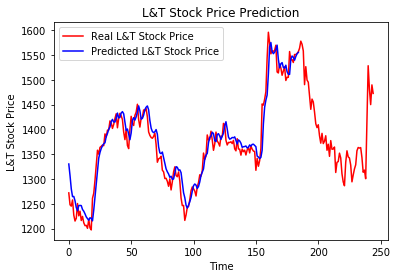

In [0]:
plt.plot(lttestprice, color = 'red', label = 'Real L&T Stock Price')
plt.plot(predicted_stock_pricelt, color = 'blue', label = 'Predicted L&T Stock Price')
plt.title('L&T Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('L&T Stock Price')
plt.legend()
plt.show()

In [0]:
ltregressor.save('LT')

In [0]:
#TCS
tcs_traindata=NSE.get_history(symbol='TCS',start=date(2015,1,1),end=date(2018,9,27))
tcs_testdata=NSE.get_history(symbol='TCS',start=date(2018,9,28),end=date(2019,9,28))

In [0]:
for i in droplist:
  tcs_traindata.drop(i,1,inplace=True)

In [0]:
tcstrainset=tcs_traindata.iloc[:,3:4].values

In [0]:
tcstrainset_scaled=scaler.fit_transform(tcstrainset)

x_train_tcs=[]
y_train_tcs=[]

for i in range(60, 926):
    x_train_tcs.append(tcstrainset_scaled[i-60:i, 0])
    y_train_tcs.append(tcstrainset_scaled[i, 0])
x_train_tcs, y_train_tcs = np.array(x_train_tcs), np.array(y_train_tcs)

# Reshaping
x_train_tcs = np.reshape(x_train_tcs, (x_train_tcs.shape[0], x_train_tcs.shape[1], 1))

In [0]:
tcsregressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
tcsregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
tcsregressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
tcsregressor.add(LSTM(units = 50, return_sequences = True))
tcsregressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
tcsregressor.add(LSTM(units = 50))
tcsregressor.add(Dropout(0.2))
tcsregressor.add(Dense(units=1))
tcsregressor.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
tcsregressor.fit(x_train_tcs,y_train_tcs,epochs=100,batch_size=32,verbose=1)

In [0]:
for i in droplist:
  tcs_testdata.drop(i,1,inplace=True)

In [0]:
tcstestprice=tcs_testdata.iloc[:,3:4].values

In [0]:
dataset_total_tcs = pd.concat((tcs_traindata['Close'], tcs_testdata['Close']), axis = 0)
inputs_tcs = dataset_total_tcs[len(dataset_total_tcs) - len(tcs_testdata) - 60:].values
inputs_tcs = inputs_tcs.reshape(-1,1)
inputs_tcs = scaler.transform(inputs_tcs)

In [0]:
x_testtcs = []
for i in range(60, 245):
    x_testtcs.append(inputs_tcs[i-60:i, 0])
x_testtcs = np.array(x_testtcs)
x_testtcs = np.reshape(x_testtcs, (x_testtcs.shape[0], x_testtcs.shape[1], 1))
predicted_stock_pricetcs = tcsregressor.predict(x_testtcs)
predicted_stock_pricetcs = scaler.inverse_transform(predicted_stock_pricetcs)


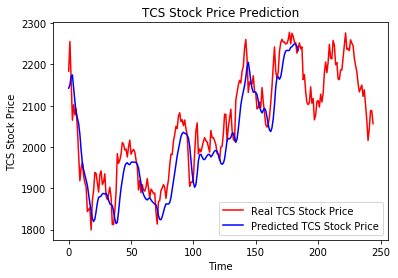

In [0]:
plt.plot(tcstestprice, color = 'red', label = 'Real TCS Stock Price')
plt.plot(predicted_stock_pricetcs, color = 'blue', label = 'Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()

In [0]:
#HDFC
hdfc_traindata=NSE.get_history(symbol='HDFCBANK',start=date(2015,1,1),end=date(2018,9,27))
hdfc_testdata=NSE.get_history(symbol='HDFCBANK',start=date(2018,9,28),end=date(2019,9,28))
for i in droplist:
  hdfc_traindata.drop(i,1,inplace=True)
hdfctrainset=hdfc_traindata.iloc[:,3:4].values
hdfctrainset_scaled=scaler.fit_transform(hdfctrainset)

x_train_hdfc=[]
y_train_hdfc=[]

for i in range(60, 926):
    x_train_hdfc.append(hdfctrainset_scaled[i-60:i, 0])
    y_train_hdfc.append(hdfctrainset_scaled[i, 0])
x_train_hdfc, y_train_hdfc = np.array(x_train_hdfc), np.array(y_train_hdfc)

# Reshaping
x_train_hdfc = np.reshape(x_train_hdfc, (x_train_hdfc.shape[0], x_train_hdfc.shape[1], 1))

hdfcregressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
hdfcregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
hdfcregressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
hdfcregressor.add(LSTM(units = 50, return_sequences = True))
hdfcregressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
hdfcregressor.add(LSTM(units = 50))
hdfcregressor.add(Dropout(0.2))
hdfcregressor.add(Dense(units=1))
hdfcregressor.compile(optimizer='adam',loss='mean_squared_error')

hdfcregressor.fit(x_train_hdfc,y_train_hdfc,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
866/866 [==============================] - 11s 13ms/step - loss: 0.0533
Epoch 2/100
866/866 [==============================] - 4s 5ms/step - loss: 0.0053
Epoch 3/100
866/866 [==============================] - 4s 5ms/step - loss: 0.0043
Epoch 4/100
866/866 [==============================] - 4s 5ms/step - loss: 0.0040
Epoch 5/100
866/866 [==============================] - 4s 5ms/step - loss: 0.0034
Epoch 6/100
866/866 [==============================] - 4s 5ms/step - loss: 0.0035
Epoch 7/100
866/866 [==============================] - 4s 5ms/step - loss: 0.0030
Epoch 8/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0030
Epoch 9/100
866/866 [==============================] - 4s 5ms/step - loss: 0.0026
Epoch 10/100
866/866 [==============================] - 4s 5ms/step - loss: 0.0032
Epoch 11/100
866/866 [==============================] - 4s 5ms/step - loss: 0.0029
Epoch 12/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0030
Epoch 13/10

In [0]:
for i in droplist:
  hdfc_testdata.drop(i,1,inplace=True)
hdfctestprice=hdfc_testdata.iloc[:,3:4].values
dataset_total_hdfc = pd.concat((hdfc_traindata['Close'], hdfc_testdata['Close']), axis = 0)
inputs_hdfc = dataset_total_hdfc[len(dataset_total_hdfc) - len(hdfc_testdata) - 60:].values
inputs_hdfc = inputs_hdfc.reshape(-1,1)
inputs_hdfc = scaler.transform(inputs_hdfc)
x_testhdfc = []
for i in range(60, 245):
    x_testhdfc.append(inputs_hdfc[i-60:i, 0])
x_testhdfc = np.array(x_testhdfc)
x_testhdfc = np.reshape(x_testhdfc, (x_testhdfc.shape[0], x_testhdfc.shape[1], 1))
predicted_stock_pricehdfc = hdfcregressor.predict(x_testhdfc)
predicted_stock_pricehdfc = scaler.inverse_transform(predicted_stock_pricehdfc)


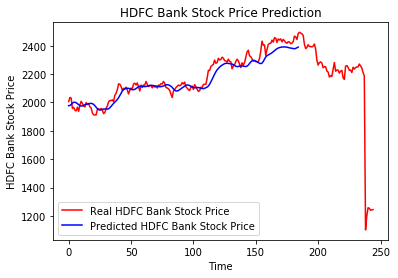

In [0]:
plt.plot(hdfctestprice, color = 'red', label = 'Real HDFC Bank Stock Price')
plt.plot(predicted_stock_pricehdfc, color = 'blue', label = 'Predicted HDFC Bank Stock Price')
plt.title('HDFC Bank Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HDFC Bank Stock Price')
plt.legend()
plt.show()

In [0]:
#HDFC housing
#HDFC
hdfch_traindata=NSE.get_history(symbol='HDFC',start=date(2015,1,1),end=date(2018,9,27))
hdfch_testdata=NSE.get_history(symbol='HDFC',start=date(2018,9,28),end=date(2019,9,28))
for i in droplist:
  hdfch_traindata.drop(i,1,inplace=True)
hdfchtrainset=hdfch_traindata.iloc[:,3:4].values
hdfchtrainset_scaled=scaler.fit_transform(hdfchtrainset)

x_train_hdfch=[]
y_train_hdfch=[]

for i in range(60, 926):
    x_train_hdfch.append(hdfchtrainset_scaled[i-60:i, 0])
    y_train_hdfch.append(hdfchtrainset_scaled[i, 0])
x_train_hdfch, y_train_hdfch = np.array(x_train_hdfch), np.array(y_train_hdfch)

# Reshaping
x_train_hdfch = np.reshape(x_train_hdfch, (x_train_hdfch.shape[0], x_train_hdfch.shape[1], 1))

hdfchregressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
hdfchregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
hdfchregressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
hdfchregressor.add(LSTM(units = 50, return_sequences = True))
hdfchregressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
hdfchregressor.add(LSTM(units = 50))
hdfchregressor.add(Dropout(0.2))
hdfchregressor.add(Dense(units=1))
hdfchregressor.compile(optimizer='adam',loss='mean_squared_error')

hdfchregressor.fit(x_train_hdfch,y_train_hdfch,epochs=100,batch_size=32,verbose=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
866/866 [==============================] - 6s 7ms/step - loss: 0.0613
Epoch 2/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0085
Epoch 3/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0056
Epoch 4/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0053
Epoch 5/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0055
Epoch 6/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0053
Epoch 7/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0047
Epoch 8/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0049
Epoch 9/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0048
Epoch 10/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0043
Epoch 11/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0045


In [0]:
for i in droplist:
  hdfch_testdata.drop(i,1,inplace=True)
hdfchtestprice=hdfch_testdata.iloc[:,3:4].values
dataset_total_hdfch = pd.concat((hdfch_traindata['Close'], hdfch_testdata['Close']), axis = 0)
inputs_hdfch = dataset_total_hdfch[len(dataset_total_hdfch) - len(hdfch_testdata) - 60:].values
inputs_hdfch = inputs_hdfch.reshape(-1,1)
inputs_hdfch = scaler.transform(inputs_hdfch)
x_testhdfch = []
for i in range(60, 245):
    x_testhdfch.append(inputs_hdfch[i-60:i, 0])
x_testhdfch = np.array(x_testhdfch)
x_testhdfch = np.reshape(x_testhdfch, (x_testhdfch.shape[0], x_testhdfch.shape[1], 1))
predicted_stock_pricehdfch = hdfchregressor.predict(x_testhdfch)
predicted_stock_pricehdfch = scaler.inverse_transform(predicted_stock_pricehdfch)


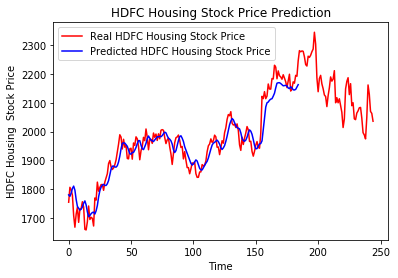

In [0]:
plt.plot(hdfchtestprice, color = 'red', label = 'Real HDFC Housing Stock Price')
plt.plot(predicted_stock_pricehdfch, color = 'blue', label = 'Predicted HDFC Housing Stock Price')
plt.title('HDFC Housing Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HDFC Housing  Stock Price')
plt.legend()
plt.show()

In [0]:
#KOTAKBANK
kotak_traindata=NSE.get_history(symbol='KOTAKBANK',start=date(2015,1,1),end=date(2018,9,27))
kotak_testdata=NSE.get_history(symbol='KOTAKBANK',start=date(2018,9,28),end=date(2019,9,28))
for i in droplist:
  kotak_traindata.drop(i,1,inplace=True)
kotaktrainset=kotak_traindata.iloc[:,3:4].values
kotaktrainset_scaled=scaler.fit_transform(kotaktrainset)

x_train_kotak=[]
y_train_kotak=[]

for i in range(60, 926):
    x_train_kotak.append(kotaktrainset_scaled[i-60:i, 0])
    y_train_kotak.append(kotaktrainset_scaled[i, 0])
x_train_kotak, y_train_kotak = np.array(x_train_kotak), np.array(y_train_kotak)

# Reshaping
x_train_kotak = np.reshape(x_train_kotak, (x_train_kotak.shape[0], x_train_kotak.shape[1], 1))

kotakregressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
kotakregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
kotakregressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
kotakregressor.add(LSTM(units = 50, return_sequences = True))
kotakregressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
kotakregressor.add(LSTM(units = 50))
kotakregressor.add(Dropout(0.2))
kotakregressor.add(Dense(units=1))
kotakregressor.compile(optimizer='adam',loss='mean_squared_error')

kotakregressor.fit(x_train_kotak,y_train_kotak,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
866/866 [==============================] - 6s 7ms/step - loss: 0.0571
Epoch 2/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0112
Epoch 3/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0122
Epoch 4/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0086
Epoch 5/100
866/866 [==============================] - 4s 4ms/step - loss: 0.0093
Epoch 6/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0076
Epoch 7/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0080
Epoch 8/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0092
Epoch 9/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0072
Epoch 10/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0080
Epoch 11/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0082
Epoch 12/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0073
Epoch 13/100


In [0]:
for i in droplist:
  kotak_testdata.drop(i,1,inplace=True)
kotaktestprice=kotak_testdata.iloc[:,3:4].values
dataset_total_kotak = pd.concat((kotak_traindata['Close'], kotak_testdata['Close']), axis = 0)
inputs_kotak = dataset_total_kotak[len(dataset_total_kotak) - len(kotak_testdata) - 60:].values
inputs_kotak = inputs_kotak.reshape(-1,1)
inputs_kotak = scaler.transform(inputs_kotak)
x_testkotak = []
for i in range(60, 245):
    x_testkotak.append(inputs_kotak[i-60:i, 0])
x_testkotak = np.array(x_testkotak)
x_testkotak = np.reshape(x_testkotak, (x_testkotak.shape[0], x_testkotak.shape[1], 1))
predicted_stock_pricekotak = kotakregressor.predict(x_testkotak)
predicted_stock_pricekotak = scaler.inverse_transform(predicted_stock_pricekotak)


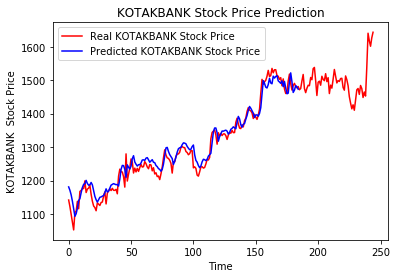

In [0]:
plt.plot(kotaktestprice, color = 'red', label = 'Real KOTAKBANK Stock Price')
plt.plot(predicted_stock_pricekotak, color = 'blue', label = 'Predicted KOTAKBANK Stock Price')
plt.title('KOTAKBANK Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('KOTAKBANK  Stock Price')
plt.legend()
plt.show()

In [0]:
#ICICIBANK
icici_traindata=NSE.get_history(symbol='ICICIBANK',start=date(2015,1,1),end=date(2018,9,27))
icici_testdata=NSE.get_history(symbol='ICICIBANK',start=date(2018,9,28),end=date(2019,9,28))
for i in droplist:
  icici_traindata.drop(i,1,inplace=True)
icicitrainset=icici_traindata.iloc[:,3:4].values
icicitrainset_scaled=scaler.fit_transform(icicitrainset)

x_train_icici=[]
y_train_icici=[]

for i in range(60, 926):
    x_train_icici.append(icicitrainset_scaled[i-60:i, 0])
    y_train_icici.append(icicitrainset_scaled[i, 0])
x_train_icici, y_train_icici = np.array(x_train_icici), np.array(y_train_icici)

# Reshaping
x_train_icici = np.reshape(x_train_icici, (x_train_icici.shape[0], x_train_icici.shape[1], 1))

iciciregressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
iciciregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
iciciregressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
iciciregressor.add(LSTM(units = 50, return_sequences = True))
iciciregressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
iciciregressor.add(LSTM(units = 50))
iciciregressor.add(Dropout(0.2))
iciciregressor.add(Dense(units=1))
iciciregressor.compile(optimizer='adam',loss='mean_squared_error')

iciciregressor.fit(x_train_icici,y_train_icici,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
866/866 [==============================] - 6s 7ms/step - loss: 0.0493
Epoch 2/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0101
Epoch 3/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0087
Epoch 4/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0071
Epoch 5/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0075
Epoch 6/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0069
Epoch 7/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0063
Epoch 8/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0068
Epoch 9/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0057
Epoch 10/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0059
Epoch 11/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0055
Epoch 12/100
866/866 [==============================] - 3s 4ms/step - loss: 0.0057
Epoch 13/100


In [0]:
for i in droplist:
  icici_testdata.drop(i,1,inplace=True)
icicitestprice=icici_testdata.iloc[:,3:4].values
dataset_total_icici = pd.concat((icici_traindata['Close'], icici_testdata['Close']), axis = 0)
inputs_icici = dataset_total_icici[len(dataset_total_kotak) - len(icici_testdata) - 60:].values
inputs_icici = inputs_icici.reshape(-1,1)
inputs_icici = scaler.transform(inputs_icici)
x_testicici = []
for i in range(60, 245):
    x_testicici.append(inputs_icici[i-60:i, 0])
x_testicici = np.array(x_testicici)
x_testicici = np.reshape(x_testicici, (x_testicici.shape[0], x_testicici.shape[1], 1))
predicted_stock_priceicici = iciciregressor.predict(x_testicici)
predicted_stock_priceicici = scaler.inverse_transform(predicted_stock_priceicici)


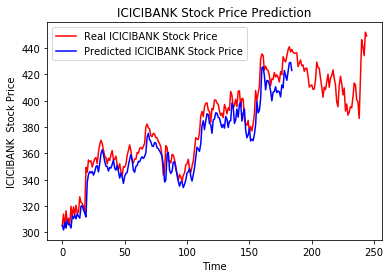

In [0]:
plt.plot(icicitestprice, color = 'red', label = 'Real ICICIBANK Stock Price')
plt.plot(predicted_stock_priceicici, color = 'blue', label = 'Predicted ICICIBANK Stock Price')
plt.title('ICICIBANK Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ICICIBANK  Stock Price')
plt.legend()
plt.show()